In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
   Output variable (based on sensory data): 
12 - quality (score between 0 and 10)

In [2]:
data = pd.read_csv("wineQualityReds.csv")
data.head()


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data = data.drop(columns = 'Unnamed: 0')

In [4]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


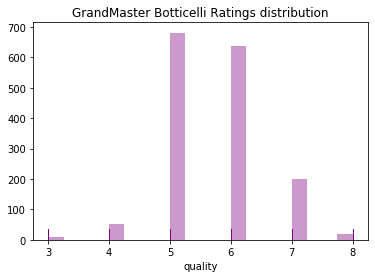

In [5]:
quality = data['quality']
hist = sns.distplot(quality, bins=20, kde=False, rug=True,  color = 'purple').set_title('GrandMaster Botticelli Ratings distribution')

                    

Now we are going to visualize each feauture against the quality metric. On the top axis we can see the distribution of the feature, while inside the box we can see the distribution of this feauture on each quality level. 

Text(0.5, 0.98, 'D) Cholrides vs Quality')

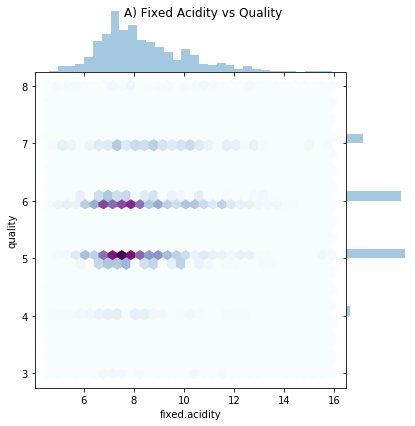

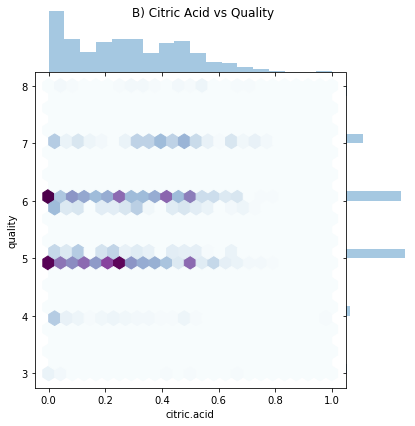

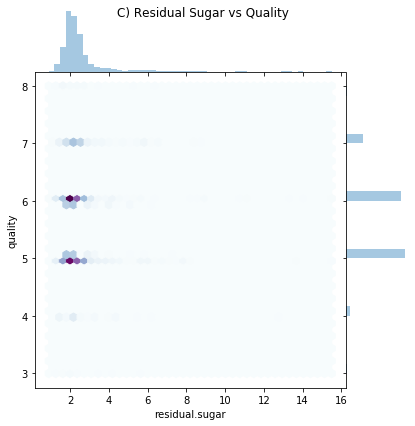

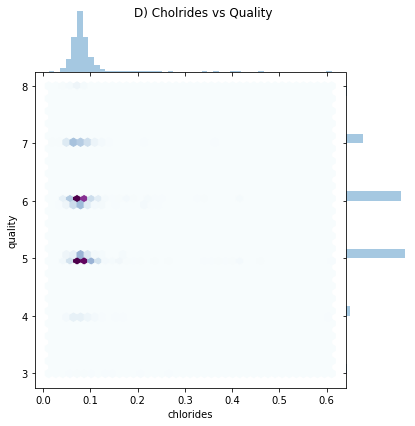

In [6]:
A = sns.jointplot(x="fixed.acidity", y="quality", data=data,  kind= 'hex', cmap = 'BuPu', space = 0 )
A.fig.suptitle('A) Fixed Acidity vs Quality')
B = sns.jointplot(x="citric.acid", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
B.fig.suptitle('B) Citric Acid vs Quality')
C = sns.jointplot(x="residual.sugar", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
C.fig.suptitle('C) Residual Sugar vs Quality')
D = sns.jointplot(x="chlorides", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
D.fig.suptitle('D) Cholrides vs Quality')


Text(0.5, 0.98, 'G) Density vs Quality')

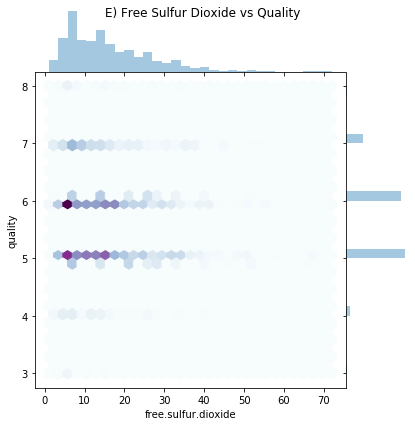

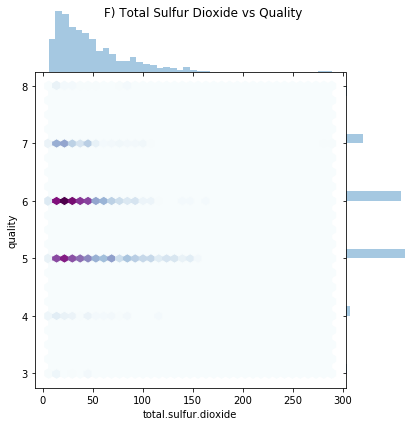

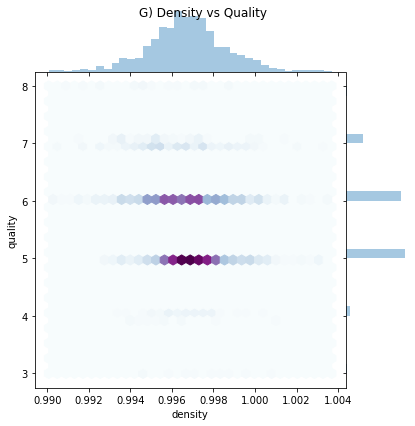

In [7]:
E = sns.jointplot(x="free.sulfur.dioxide", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
E.fig.suptitle('E) Free Sulfur Dioxide vs Quality')
F = sns.jointplot(x="total.sulfur.dioxide", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
F.fig.suptitle('F) Total Sulfur Dioxide vs Quality')
G = sns.jointplot(x="density", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
G.fig.suptitle('G) Density vs Quality')

Text(0.5, 0.98, 'J) Alcohol vs Quality')

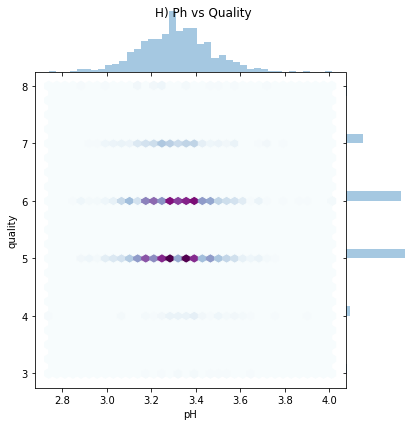

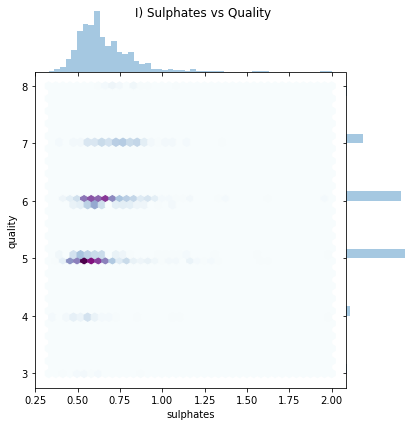

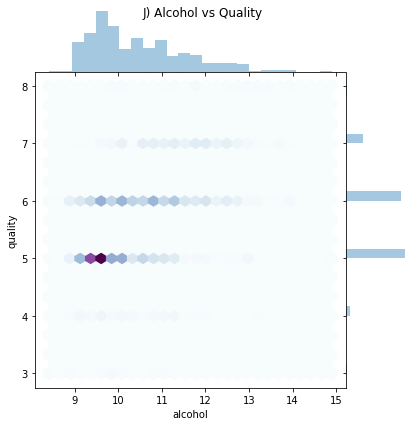

In [8]:
H = sns.jointplot(x="pH", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
H.fig.suptitle('H) Ph vs Quality')
I = sns.jointplot(x="sulphates", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
I.fig.suptitle('I) Sulphates vs Quality')
J =sns.jointplot(x="alcohol", y="quality", data=data, kind= 'hex', cmap = 'BuPu', space = 0);
J.fig.suptitle('J) Alcohol vs Quality')

In [9]:
corr = data.corr()['quality']
corr

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Correlation data. 

We can see how some chemical components hace a negative correlation to the quality, which makes sense since some components give an acidity to the wine. the feauture with the higher correlation to the quality is alcohol level, but it is not a strong correlation (0.49)

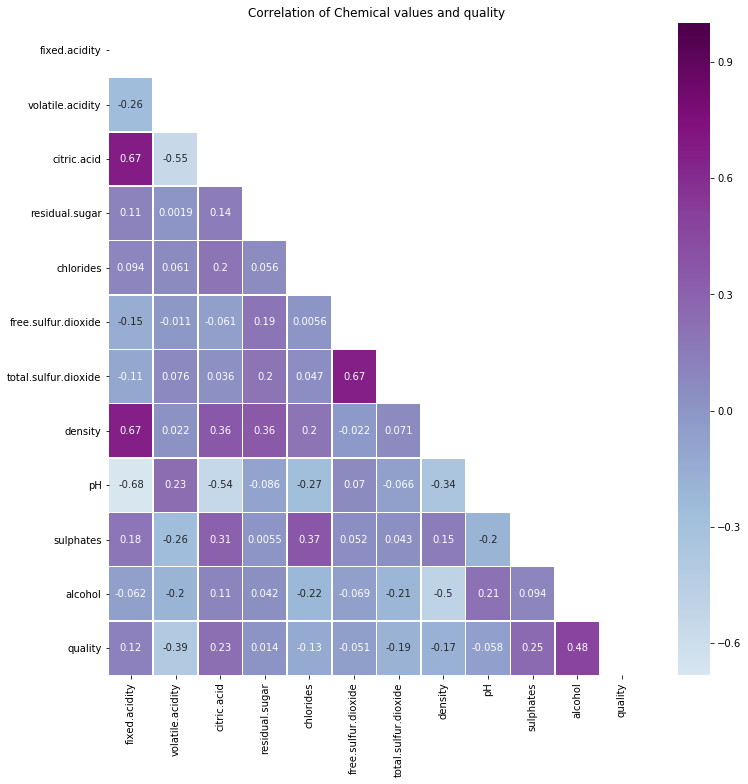

In [10]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0, linewidths=.5, cmap = 'BuPu', mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation of Chemical values and quality')
plt.show()

Feature Selection
All feautures will be selected for this study, the highest correlation between feautures was 0.67. Free Sulfur dioxide and total sulfur dioxide have a positive correlation of 0.67.

In [11]:
#features
features = data.iloc[:,:11]
print('Summary of feature sample')
features.head()

Summary of feature sample


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
#dependent variable
depVar = data['quality']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.25, random_state=0)

In [69]:
X_train.shape, X_test.shape

((1199, 11), (400, 11))

Normalization: 
MinMax Scaler
The MinMaxScaler transforms features by scaling each feature to a given range. This range can be set by specifying the feature_range parameter (default at (0,1)). This scaler works better for cases where the distribution is not Gaussian or the standard deviation is very small. However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider another scaler.
Normalization is necessary for linear regression, for logistic regression it is not necessary.

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [72]:
LinR = LinearRegression()
logR = LogisticRegression(multi_class = 'auto')

In [73]:
#Logaritmic Regression 
params = {
    'penalty':['l1', 'l2'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}
lr_gs = GridSearchCV(logR, params, cv=3, verbose=1).fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   27.9s finished


In [75]:
print("Best Params", lr_gs.best_params_)

Best Params {'C': 0.505060404040404, 'penalty': 'l2', 'solver': 'liblinear'}


In [76]:
lr_best = LogisticRegression(C= 0.505060404040404, penalty= 'l2', solver= 'liblinear')
lr_best.fit(X_train, y_train)

C:\Users\albch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.505060404040404, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
#Linear regression
Linear = LinR.fit(X_train_scaled, y_train)


In [78]:
X_test_scaled = scaler.fit_transform(X_test)
Log_predict = lr_best.predict(X_test)
Linear_predict = Linear.predict(X_test_scaled)

In [79]:
#Support Vector Machines regression
from sklearn.svm import SVR
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)


C:\Users\albch\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    4.0s finished


In [80]:
SVR_best = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR_best = SVR_best.fit(X_train, y_train)
SVR_predict = SVR_best.predict(X_test)


In [81]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
   

In [43]:
CV_rfr.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

In [46]:
rfc1=RandomForestRegressor(max_depth= 8, max_features= 'auto', n_estimators= 200)
rfc1.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
Random_predict=rfc1.predict(X_test)

In [65]:

from sklearn.metrics import mean_squared_error

linear_regression_model_mse = mean_squared_error(Linear_predict, y_test)
logistic_regression_model_mse = mean_squared_error(Log_predict, y_test)
SVR_regression_model_mse = mean_squared_error(SVR_predict, y_test)
RF_regression_model_mse = mean_squared_error(Random_predict, y_test)

linear_regression_model_mse

0.46024890155596676

In [153]:
logistic_regression_model_mse

0.4708333333333333

In [66]:
SVR_regression_model_mse

0.3776936548891199

In [49]:
RF_regression_model_mse

0.36197294700047844

In [32]:
import math
math.sqrt(linear_regression_model_mse)

0.6784164661592219

In [155]:
math.sqrt(logistic_regression_model_mse)

0.68617296167463

In [67]:
math.sqrt(SVR_regression_model_mse)

0.6145678602799856

In [50]:
math.sqrt(RF_regression_model_mse)

0.6016418760362999

In [53]:
Random_predict

array([5.53042482, 4.8788281 , 6.91217666, 5.06712266, 5.59715875,
       5.3059249 , 5.39836833, 6.09040804, 4.95164246, 5.25759754,
       5.05877519, 5.50134357, 5.56365617, 5.38661411, 5.46324641,
       6.32803453, 6.93017515, 5.37019954, 5.45215885, 4.9492684 ,
       6.30165249, 5.51928774, 5.71149639, 5.66782714, 5.3535784 ,
       5.07305879, 5.21486982, 6.71549434, 5.10124035, 6.27379401,
       5.58574449, 5.76128828, 5.57389131, 5.50903034, 6.35460323,
       6.70413503, 5.35192599, 5.46825878, 6.31340387, 5.68065924,
       5.29159443, 5.9828369 , 6.63354502, 6.53890549, 5.78860392,
       5.07195394, 5.28896791, 5.98080336, 5.45586381, 6.05408016,
       5.24500992, 5.26427738, 5.80965005, 6.2008688 , 5.73375297,
       5.23613949, 5.16208762, 5.400768  , 6.75180825, 5.60808921,
       5.35636079, 5.64219069, 5.84930418, 6.05110562, 5.28049829,
       6.19512526, 5.2272439 , 5.3331683 , 6.63672025, 6.0079454 ,
       5.53702695, 5.71791177, 4.99214168, 5.47536267, 5.71315

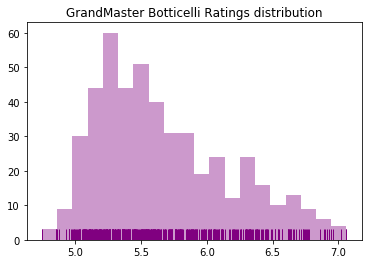

In [54]:

hist = sns.distplot(Random_predict, bins=20, kde=False, rug=True,  color = 'purple').set_title('GrandMaster Botticelli Ratings distribution')


In [55]:
rounded_predict = Random_predict.round()
rounded_linear_regression_model_mse = mean_squared_error(rounded_predict, y_test)
rounded_linear_regression_model_mse

0.45

In [56]:
math.sqrt(rounded_linear_regression_model_mse)

0.6708203932499369

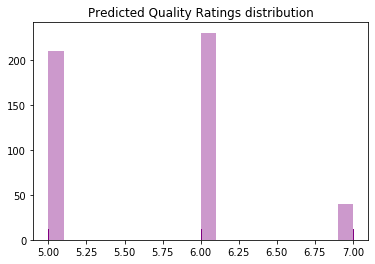

In [83]:
hist = sns.distplot(rounded_predict, bins=20, kde=False, rug=True,  color = 'purple').set_title('Predicted Quality Ratings distribution')
